# Exploratory Data Analysis - EDA
##### [Cars dataset from Kaggle](https://www.kaggle.com/datasets/CooperUnion/cardataset)
##### This EDA was taken from the NB from: [Tanu Nanda Prabhu](https://nbviewer.org/github/Tanu-N-Prabhu/Python/blob/master/Exploratory_data_Analysis.ipynb)

### 1. Import required libraries

In [557]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#magic command to display plots directly within notebook interface
%matplotlib inline  

#use own set of seaborn colors instead of matplotlib
sns.set(color_codes=True) 

### 2. Load the data into the data frame using Kaggle API


In [559]:
# Install kaggle API
!pip install kaggle

# import os module
import os

In [560]:
# Download the API key file (kaggle.json) from my Kaggle account settings.
# Go to "Account", then "API", then "Create New API Token".
# This will download the kaggle.json file.

# Move the kaggle.json file to the .kaggle directory
!mkdir -p ~/.kaggle 
!mv kaggle.json ~/.kaggle/

# Set permissions for the kaggle.json file
!chmod 600 ~/.kaggle/kaggle.json

# Set the Kaggle API endpoint
os.environ['KAGGLE_CONFIG_PATH'] = '~/.kaggle' 

# Download the dataset
!kaggle datasets download -d CooperUnion/cardataset

# Unzip the downloaded dataset
!unzip -o cardataset.zip

# you should now see data.csv uploaded in the notebook

mv: rename kaggle.json to /Users/nata/.kaggle/kaggle.json: No such file or directory
chmod: /Users/nata/.kaggle/kaggle.json: No such file or directory
Dataset URL: https://www.kaggle.com/datasets/CooperUnion/cardataset
License(s): unknown
cardataset.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  cardataset.zip
  inflating: data.csv                


### 3. Create a DataFrame and analyze the dataset (shape,dtypes, nr. of rows)

In [562]:
#create dataframe
df = pd.read_csv("data.csv")
df.head() #top 5 rows
df.tail() # bottom 5 rows

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
11909,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,46120
11910,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,56670
11911,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50620
11912,Acura,ZDX,2013,premium unleaded (recommended),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50920
11913,Lincoln,Zephyr,2006,regular unleaded,221.0,6.0,AUTOMATIC,front wheel drive,4.0,Luxury,Midsize,Sedan,26,17,61,28995


In [563]:
df.shape

(11914, 16)

In [564]:
df.dtypes # check datatypes, do we need to convert anything into integer format? --> here no. 

Make                  object
Model                 object
Year                   int64
Engine Fuel Type      object
Engine HP            float64
Engine Cylinders     float64
Transmission Type     object
Driven_Wheels         object
Number of Doors      float64
Market Category       object
Vehicle Size          object
Vehicle Style         object
highway MPG            int64
city mpg               int64
Popularity             int64
MSRP                   int64
dtype: object

### 4. Dropping irrelevant columns

In [566]:

df = df.drop(['Engine Fuel Type', 'Market Category', 'Vehicle Style', 'Popularity', 'Number of Doors', 'Vehicle Size'], axis=1)


In [567]:
df.head()

,Make,Model,Year,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,highway MPG,city mpg,MSRP
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,rear wheel drive,26,19,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,19,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,20,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,34500


## 5. Rename columns

In [569]:
df = df.rename(columns={'Engine HP':'HP', 'Engine Cylinders':'Cylinders','Transmission Type':'Transmission', 'Driven Wheels':'Drive Mode','highway MPG':'MPG-H','city mpg':'MPG-C','MSRP':'Price'})

df

,Make,Model,Year,HP,Cylinders,Transmission,Driven_Wheels,MPG-H,MPG-C,Price
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,rear wheel drive,26,19,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,19,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,20,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,34500
...,...,...,...,...,...,...,...,...,...,...
11909,Acura,ZDX,2012,300.0,6.0,AUTOMATIC,all wheel drive,23,16,46120
11910,Acura,ZDX,2012,300.0,6.0,AUTOMATIC,all wheel drive,23,16,56670
11911,Acura,ZDX,2012,300.0,6.0,AUTOMATIC,all wheel drive,23,16,50620
11912,Acura,ZDX,2013,300.0,6.0,AUTOMATIC,all wheel drive,23,16,50920


## 6. Remove duplicate rows

In [571]:
df.shape

(11914, 10)

In [572]:
duplicate_rows_df = df[df.duplicated()]
print(" Nr. duplicate rows is: ", duplicate_rows_df.shape)

 Nr. duplicate rows is:  (989, 10)


In [573]:
df.count() # before removing the duplicate rows we count how many we have 

Make             11914
Model            11914
Year             11914
HP               11845
Cylinders        11884
Transmission     11914
Driven_Wheels    11914
MPG-H            11914
MPG-C            11914
Price            11914
dtype: int64

In [574]:
11914-989

10925

In [575]:
df=df.drop_duplicates()
df.head()

,Make,Model,Year,HP,Cylinders,Transmission,Driven_Wheels,MPG-H,MPG-C,Price
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,rear wheel drive,26,19,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,19,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,20,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,34500


In [576]:
df.count()

Make             10925
Model            10925
Year             10925
HP               10856
Cylinders        10895
Transmission     10925
Driven_Wheels    10925
MPG-H            10925
MPG-C            10925
Price            10925
dtype: int64

In [577]:
df.shape

(10925, 10)

## 7. Drop NULLs or missing values

In [579]:
#Dropping missing values not always best practice. Sometimes you can replace missing values with the mean or average of column. 
#Here, we have <100 missing compared to >10,000 rows, comparatively a small/negiligble number so we will drop them

In [580]:
print(df.isnull().sum())

Make              0
Model             0
Year              0
HP               69
Cylinders        30
Transmission      0
Driven_Wheels     0
MPG-H             0
MPG-C             0
Price             0
dtype: int64


In [581]:
df=df.dropna() #dropping missing values
df.count()

Make             10827
Model            10827
Year             10827
HP               10827
Cylinders        10827
Transmission     10827
Driven_Wheels    10827
MPG-H            10827
MPG-C            10827
Price            10827
dtype: int64

In [582]:
# all columns containing Null or NA (in cylinders and horsepower) have now been removed

print(df.isnull().sum())

Make             0
Model            0
Year             0
HP               0
Cylinders        0
Transmission     0
Driven_Wheels    0
MPG-H            0
MPG-C            0
Price            0
dtype: int64


## 8. Outliers - detect and remove

Outliers are one reason for less accurate models. 


#### IQR Score Technique

https://towardsdatascience.com/ways-to-detect-and-remove-the-outliers-404d16608dba

The IQR (Interquartile Range) score technique is a method used in statistics to identify potential outliers in a dataset. It's based on the concept of the interquartile range, which is the range between the first quartile (Q1, 25th percentile) and the third quartile (Q3, 75th percentile) of the data.

Robust to extreme values: Unlike methods that rely on the mean and standard deviation (like z-scores), the IQR is not heavily influenced by extreme values or outliers. This makes it a more reliable method for identifying outliers in skewed or non-normal distributions.
Easy to understand and implement: The IQR score technique is relatively simple to calculate and interpret.

The IQR score technique is just one method for identifying outliers. Other methods include z-scores, modified z-scores, and boxplots.
The choice of method depends on the specific dataset and the goals of the analysis.
Identifying a data point as an outlier doesn't necessarily mean it should be removed. It's important to investigate the cause of the outlier and determine the appropriate course of action.


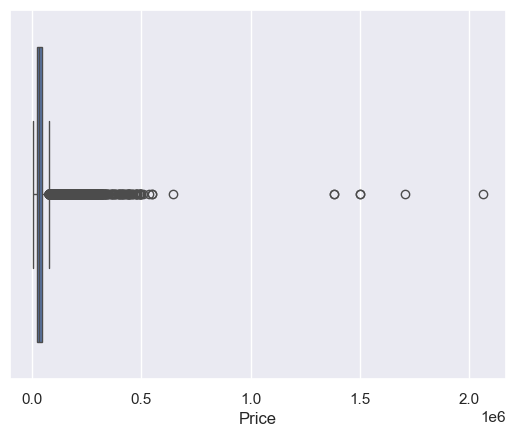

In [585]:
sns.boxplot(x=df['Price'])
plt.show()

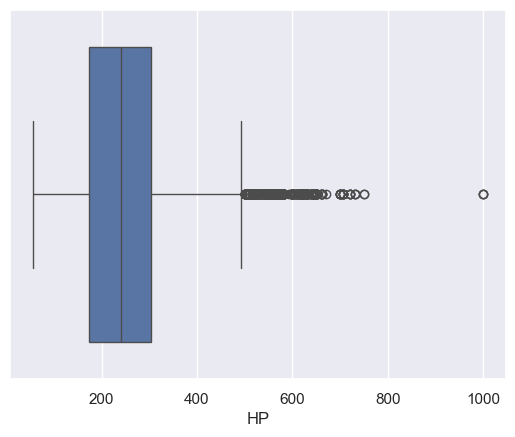

In [586]:
sns.boxplot(x=df['HP'])
plt.show()

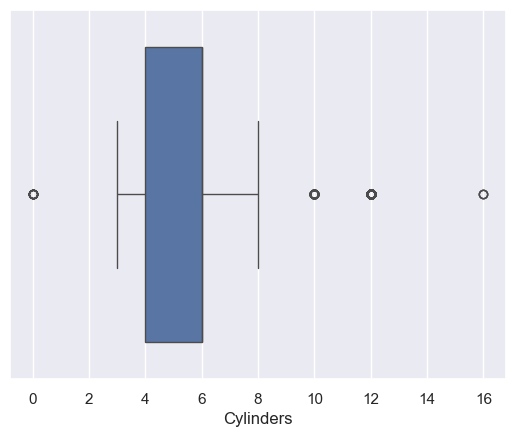

In [587]:
sns.boxplot(x=df['Cylinders'])
plt.show()

In [588]:
# we were obtaining error, possibly due to str values
# we attempt to solve usingonlynumeric columns:
numeric_df = df.select_dtypes(include=np.number)

# now instead of df use numeric_df

Q1 = numeric_df.quantile(0.25)
Q3 = numeric_df.quantile(0.75)
IQR= Q3-Q1
print(IQR)

Year             9.0
HP             130.0
Cylinders        2.0
MPG-H            8.0
MPG-C            6.0
Price        21327.5
dtype: float64


In [589]:
# filters outliers based on numeric columns only

df=df[~((numeric_df < (Q1-1.5*IQR)) | (numeric_df > (Q3+1.5*IQR))).any(axis=1)]
df.shape

(9191, 10)

As seen above 10827-9191 = 1636 rows were outliers and were removed.

## 9. Plot different features against one another

#### Histogramm

- Frequency of occurence of variables in an interval
Here: 10 types of manufacturing companies. Who has the most cars? We we plot total number of cars manufactured by each company

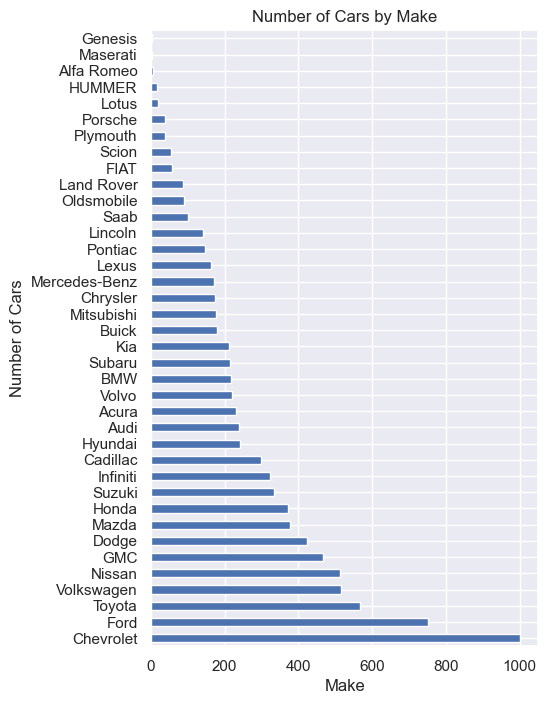

In [593]:
# use barh to make chart vertical
df.Make.value_counts().nlargest(40).plot(kind='barh', figsize=(5,8)) 
plt.title("Number of Cars by Make")
plt.ylabel('Number of Cars')
plt.xlabel('Make')
plt.show()

In [594]:
# similar chart below, however with values on each bar, horizontal and somewhat "prettier"

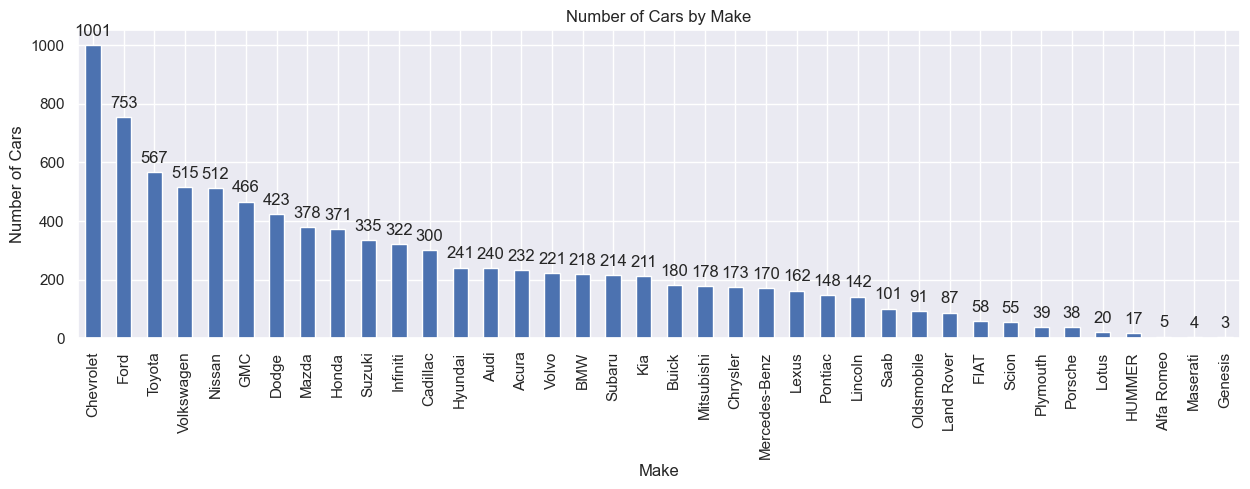

In [595]:
# Count occurrences of each make
value_counts = df['Make'].value_counts()

# Plot the bar chart
ax = value_counts.nlargest(40).plot(kind='bar', figsize=(15,4)) 
plt.title("Number of Cars by Make")
plt.ylabel('Number of Cars')
plt.xlabel('Make')

# Add value labels to each bar
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.show()

In [596]:
value_counts.tail(10)

Make
Land Rover    87
FIAT          58
Scion         55
Plymouth      39
Porsche       38
Lotus         20
HUMMER        17
Alfa Romeo     5
Maserati       4
Genesis        3
Name: count, dtype: int64

#### Heat Maps

Good help when we need to find dependent variables. --> Relationship between features

Example: below we see that price features depends mainly on Engine Size, HP and Cylinders


***Steps:***
1. Import necessary libraries: Imports pandas, seaborn, and matplotlib for data manipulation, visualization, and plotting. Installs or upgrades them using !pip install if necessary.
2. Select numerical features: The line numerical_df = df.select_dtypes(include=['number']) creates a new DataFrame numerical_df containing only the columns from the original df that have numerical data types. This ensures that the correlation 3. calculation is performed only on numerical data.
3. Calculate correlation: c = numerical_df.corr() calculates the correlation matrix using the numerical DataFrame.
4. Plot heatmap: The code creates a heatmap using sns.heatmap() and displays it using plt.show().
5. Display correlation matrix: c is displayed to show the calculated correlation values.

<Figure size 1000x500 with 0 Axes>

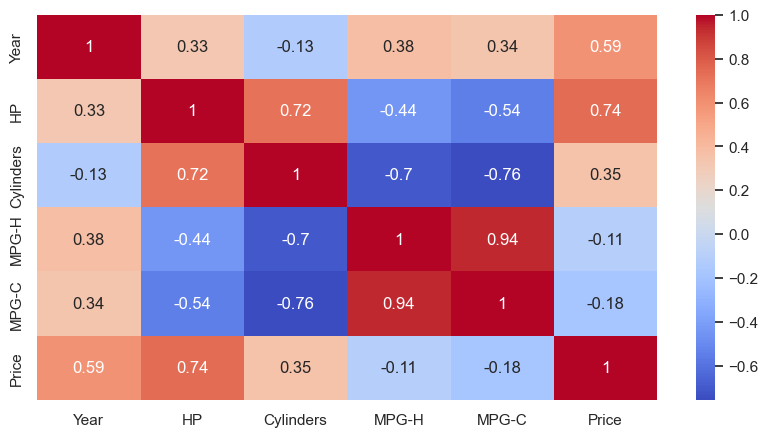

,Year,HP,Cylinders,MPG-H,MPG-C,Price
Year,1.000000,0.326726,-0.133920,0.378479,0.338145,0.592983
HP,0.326726,1.000000,0.715237,-0.443807,-0.544551,0.739042
Cylinders,-0.133920,0.715237,1.000000,-0.703856,-0.755540,0.354013
MPG-H,0.378479,-0.443807,-0.703856,1.000000,0.939141,-0.106320
MPG-C,0.338145,-0.544551,-0.755540,0.939141,1.000000,-0.180515
Price,0.592983,0.739042,0.354013,-0.106320,-0.180515,1.000000


In [684]:
# code ammended by google AI/Colab, we were having issues getting the Heatmap

# Assuming 'df' is your DataFrame
# Select only numerical features for correlation analysis
numerical_df = df.select_dtypes(include=['number'])  # Selects columns with numeric types

# Calculate the correlation matrix
c = numerical_df.corr()

# Plot the heatmap
plt.figure(figsize=(10, 5))
sns.heatmap(c, cmap="coolwarm", annot=True) # other color pattern: viridis, inferno, plasma,cividis, Blues, Greens, Red

plt.show()  # Display the plot

c  # Display the correlation matrix


Understanding Correlation

***Values: The numbers in each cell represent the correlation coefficient, ranging from -1 to 1.***

1: Perfect positive correlation (when one value increases, the other increases proportionally).   
-1: Perfect negative correlation (when one value increases, the other decreases proportionally).   
0: No correlation (the variables don't have a linear relationship).   

  
***Key Insights from Heatmap***

Strong Positive Correlations:
MPG-H and MPG-C: This makes sense, as highway and city mileage tend to be related.
HP and Price: More powerful cars generally cost more.

Moderate Positive Correlation:
Year and Price: Newer cars tend to be more expensive.

Moderate Negative Correlations:
Cylinders and MPG-H/MPG-C: Cars with more cylinders generally have lower fuel efficiency.
HP and MPG-H/MPG-C: Higher horsepower often means lower fuel economy.

Weak Correlations:
Year and HP: While there might be some trend, the relationship between year and horsepower isn't very strong.
Cylinders and Price: The number of cylinders doesn't have a strong direct impact on price.

***Important Notes:***

Correlation vs. Causation: Correlation doesn't necessarily imply causation. Just because two variables are correlated doesn't mean one causes the other. There could be other underlying factors.   
Linear Relationships: Correlation measures linear relationships. If the relationship is non-linear, the correlation coefficient might not accurately reflect it.   
Context: Understanding the context of your data is crucial for interpreting the heatmap. In this case, knowledge about cars and the automotive industry helps make sense of the correlations.
By analyzing this heatmap, you can gain valuable insights into the relationships between different car attributes and use this information for further analysis, modeling, or decision-making.

### Scatterplot

With Scatterplot correlations can be found between 2 variables. --> Draw a trendline. 

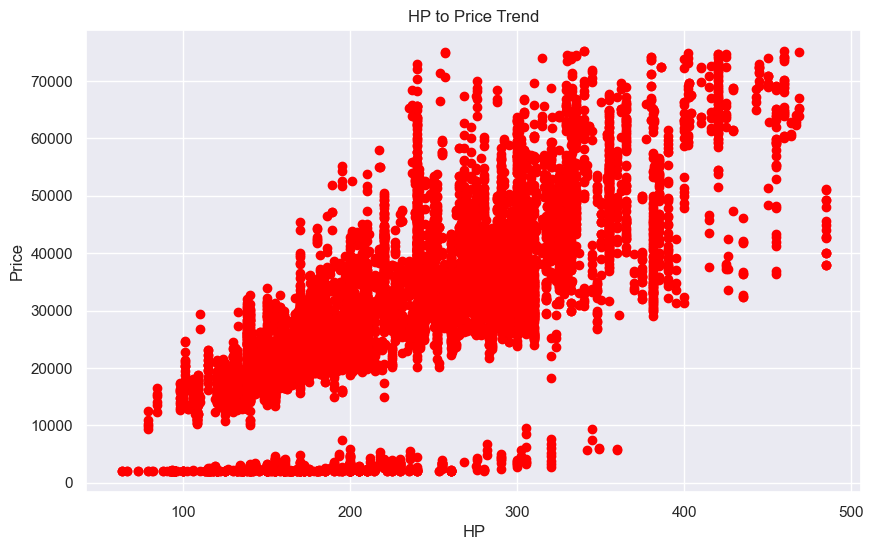

In [696]:
fig, ax=plt.subplots(figsize=(10,6))
ax.scatter(df['HP'], df['Price'], color='red')
ax.set_xlabel('HP')
ax.set_ylabel('Price')
plt.title("HP to Price Trend")
plt.show()